Understanding word2vec analogy :

Word2vec is a two-layer neural net that processes text. Its input is a text corpus and its output is a set of vectors: feature vectors for words in that corpus. While Word2vec is not a deep neural network, it turns text into a numerical form that deep nets can understand.

Here I have created the corpus By using the King-Queen Quotes ,
So the output may not be that appropiate , but it can help to understand the word2vec analogy 

In [1]:
corpus = ['king is a brave man' , 'Queen is a beautiful women' , 'Treat every woman like a Queen or you will lose her to a king' , 'Every woman needs a man who will stay faithful & who will treat her like a queen. Not a boy who will test her trust & play with her feelings.' ,'Every king springs from a race of slaves, and every slave had kings among his ancestors', 'I’d like to be queen of people’s hearts', 'A real man treats his lady like a queen, and a real lady treats her man like a king.' ,'A real man gives his lady the attention she deserves, gives her all of his love, calls her beautiful, and treats her like a queen.']


In [2]:

def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be' , '(' , ')' , ';' , ',' ,'to' ,'the','their']
    results = []
    for text in corpus:
        tmp = text.split(' ') 
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [3]:
corpus = remove_stop_words(corpus)


In [4]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [5]:

words

{'&',
 'A',
 'Every',
 'I’d',
 'Not',
 'Queen',
 'Treat',
 'a',
 'all',
 'among',
 'ancestors',
 'and',
 'attention',
 'beautiful',
 'beautiful,',
 'boy',
 'brave',
 'calls',
 'deserves,',
 'every',
 'faithful',
 'feelings.',
 'from',
 'gives',
 'had',
 'hearts',
 'her',
 'his',
 'king',
 'king.',
 'kings',
 'lady',
 'like',
 'lose',
 'love,',
 'man',
 'needs',
 'of',
 'or',
 'people’s',
 'play',
 'queen',
 'queen,',
 'queen.',
 'race',
 'real',
 'she',
 'slave',
 'slaves,',
 'springs',
 'stay',
 'test',
 'treat',
 'treats',
 'trust',
 'who',
 'will',
 'with',
 'woman',
 'women',
 'you'}

In [6]:

word2int = {} # dictionary 

for i,word in enumerate(words):
    word2int[word] = i

sentences = []  #list of list of names 
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])
                
print(type(word2int))
print(sentences)
print(type(data))
data


<class 'dict'>
[['king', 'brave', 'man'], ['Queen', 'beautiful', 'women'], ['Treat', 'every', 'woman', 'like', 'Queen', 'or', 'you', 'lose', 'her', 'a', 'king'], ['Every', 'woman', 'needs', 'man', 'who', 'stay', 'faithful', '&', 'who', 'will', 'treat', 'her', 'like', 'a', 'queen.', 'Not', 'a', 'boy', 'who', 'will', 'test', 'her', 'trust', '&', 'play', 'with', 'her', 'feelings.'], ['Every', 'king', 'springs', 'from', 'race', 'of', 'slaves,', 'and', 'every', 'slave', 'had', 'kings', 'among', 'his', 'ancestors'], ['I’d', 'like', 'queen', 'of', 'people’s', 'hearts'], ['A', 'real', 'man', 'treats', 'his', 'lady', 'like', 'queen,', 'and', 'a', 'real', 'lady', 'treats', 'her', 'man', 'like', 'a', 'king.'], ['A', 'real', 'man', 'gives', 'his', 'lady', 'attention', 'she', 'deserves,', 'gives', 'her', 'all', 'of', 'his', 'love,', 'calls', 'her', 'beautiful,', 'and', 'treats', 'her', 'like', 'queen.']]
<class 'list'>


In [7]:
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

king brave man
Queen beautiful women
Treat every woman like Queen or you lose her a king
Every woman needs man who stay faithful & who will treat her like a queen. Not a boy who will test her trust & play with her feelings.
Every king springs from race of slaves, and every slave had kings among his ancestors
I’d like queen of people’s hearts
A real man treats his lady like queen, and a real lady treats her man like a king.
A real man gives his lady attention she deserves, gives her all of his love, calls her beautiful, and treats her like queen.


In [8]:
df.head(10)

,input,label
0,king,brave
1,king,man
2,brave,king
3,brave,man
4,man,king
5,man,brave
6,Queen,beautiful
7,Queen,women
8,beautiful,Queen
9,beautiful,women


In [9]:
df.shape


(380, 2)

In [10]:
 # Encoding and embeddinbg 
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words) # dimention of one hot representation 

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X) # to conver any input to the array 
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [11]:

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  5.007926
iteration 3000 loss is :  3.6384785
iteration 6000 loss is :  3.4828901
iteration 9000 loss is :  3.3994188
iteration 12000 loss is :  3.3342853
iteration 15000 loss is :  3.281383
iteration 18000 loss is :  3.2427838


In [12]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[ 2.3661253  -0.37411475]
 [ 0.15942025  1.119098  ]
 [ 2.8278217   1.3382523 ]
 [ 2.1149063   0.18029505]
 [ 0.3961092   0.17340869]
 [ 1.8493297  -0.21930373]
 [ 3.5091238   1.1639694 ]
 [ 0.26118064  3.1679125 ]
 [ 0.820037   -1.5500844 ]
 [ 0.3055992   0.7348806 ]
 [ 0.19601327  1.2223115 ]
 [-0.06887734 -0.5306282 ]
 [ 0.8279412  -0.44413126]
 [-0.76022506  0.91709375]
 [ 2.893928    1.0843501 ]
 [ 0.816279   -0.90353847]
 [ 1.8516798   1.0024158 ]
 [ 1.6635299   2.6200547 ]
 [ 0.22794503  0.08133262]
 [-0.3274951   2.6197839 ]
 [ 2.6875978   0.49658352]
 [-0.76452637  3.9213467 ]
 [ 0.9573162  -0.80141544]
 [-0.63961065  0.2845534 ]
 [ 2.0316725   1.8029127 ]
 [-0.10202342  3.7060964 ]
 [ 0.00833708  3.817552  ]
 [ 1.5181817   0.12122947]
 [ 2.3874645  -2.1305597 ]
 [ 2.0591397  -1.1441004 ]
 [ 1.4938086   0.16672742]
 [ 0.6219722  -0.63541925]
 [ 0.80493164  0.605249  ]
 [-0.4267441   2.513677  ]
 [ 0.15641922  0.20455295]
 [ 0.39172405  3.6822538 ]
 [-0.26465845  0.09726155]
 

In [13]:

w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,attention,2.366125,-0.374115
1,or,0.159420,1.119098
2,A,2.827822,1.338252
3,"love,",2.114906,0.180295
4,king,0.396109,0.173409
...,...,...,...
56,treat,0.467713,3.507965
57,trust,-0.609974,2.164006
58,gives,2.218700,0.298922
59,&,-0.468596,2.942924


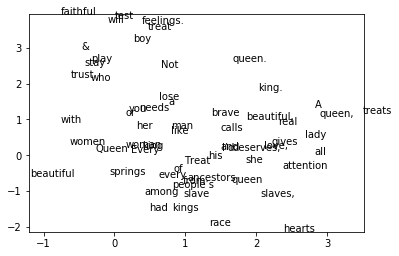

In [15]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 0.01
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (20,20)

plt.show()